### 1. Basic Linguistic Features
- **Reading Ease and Grade Level Metrics**
  - Focus on readability scores (e.g., Flesch Reading Ease, Flesch-Kincaid Grade) that assess text complexity.
- **Sentence and Word Length Analysis**
  - Examination of average sentence and word lengths to understand syntactic complexity.

### 2. Lexical Diversity Metrics
- **Type-Token Ratios and Advanced Lexical Diversity Measures**
  - Discussion of basic (TTR) and sophisticated (MTLD) metrics for evaluating vocabulary richness and variation across texts.

### 3. Syntactic Complexity Analysis
- **Dependency Parsing and Structural Metrics**
  - Investigation of syntactic structures through metrics like average parse tree depth, clause density, and average dependency distance.

### 4. Repetitiveness in Text
- **Phrase Repetitiveness Across Different N-Gram Lengths**
  - Analysis of repetitive patterns at multiple levels (from unigrams to four-grams), which might indicate stylistic differences between human and AI-generated texts.

### 5. Text Perplexity Assessment
- **Perplexity Measurement Using BERT**
  - Employing BERT models to calculate text perplexity, offering insights into the model's predictions and the inherent complexity of texts across different languages and authorship types.

### 6. Text Compression Analysis
- **Compression Ratio as a Measure of Predictability**
  - Utilization of compression ratios to infer text predictability and information density, potentially distinguishing between human and machine writing styles.

### 7. Part-of-Speech Distribution
- **POS Tagging and Frequency Analysis**
  - Exploration of the distribution of grammatical categories to uncover linguistic patterns and anomalies in text generation processes.

### 8. Semantic Coherence
- **Vector-Based and Transformer-Based Semantic Coherence**
  - Comparative analysis of coherence using traditional word vectors and advanced transformer models to assess the continuity and logical flow of ideas in texts.

In [ ]:
# pip install textstat

In [ ]:
# pip install lexical-diversity

In [ ]:
# pip install spacy

In [ ]:
# pip install sentence_transformers

In [ ]:
!python -m spacy download en_core_web_lg
!python -m spacy download es_core_news_lg
!python -m spacy download fr_core_news_lg

In [1]:
import pandas as pd
from textstat.textstat import textstat
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from tqdm import tqdm
from lexical_diversity import lex_div as ld
import spacy
from nltk import ngrams, FreqDist
from collections import Counter
from transformers import BertTokenizer, BertForMaskedLM
import torch
import lzma
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [37]:
# Load dataset
df = pd.read_csv('Multi_Model_Multi_Lingual.csv')

In [2]:
# Load sample dataset
# df = pd.read_csv('Multi - Copy.csv')

### 1. Basic Linguistic Features

100%|██████████| 23941/23941 [01:50<00:00, 216.68it/s]


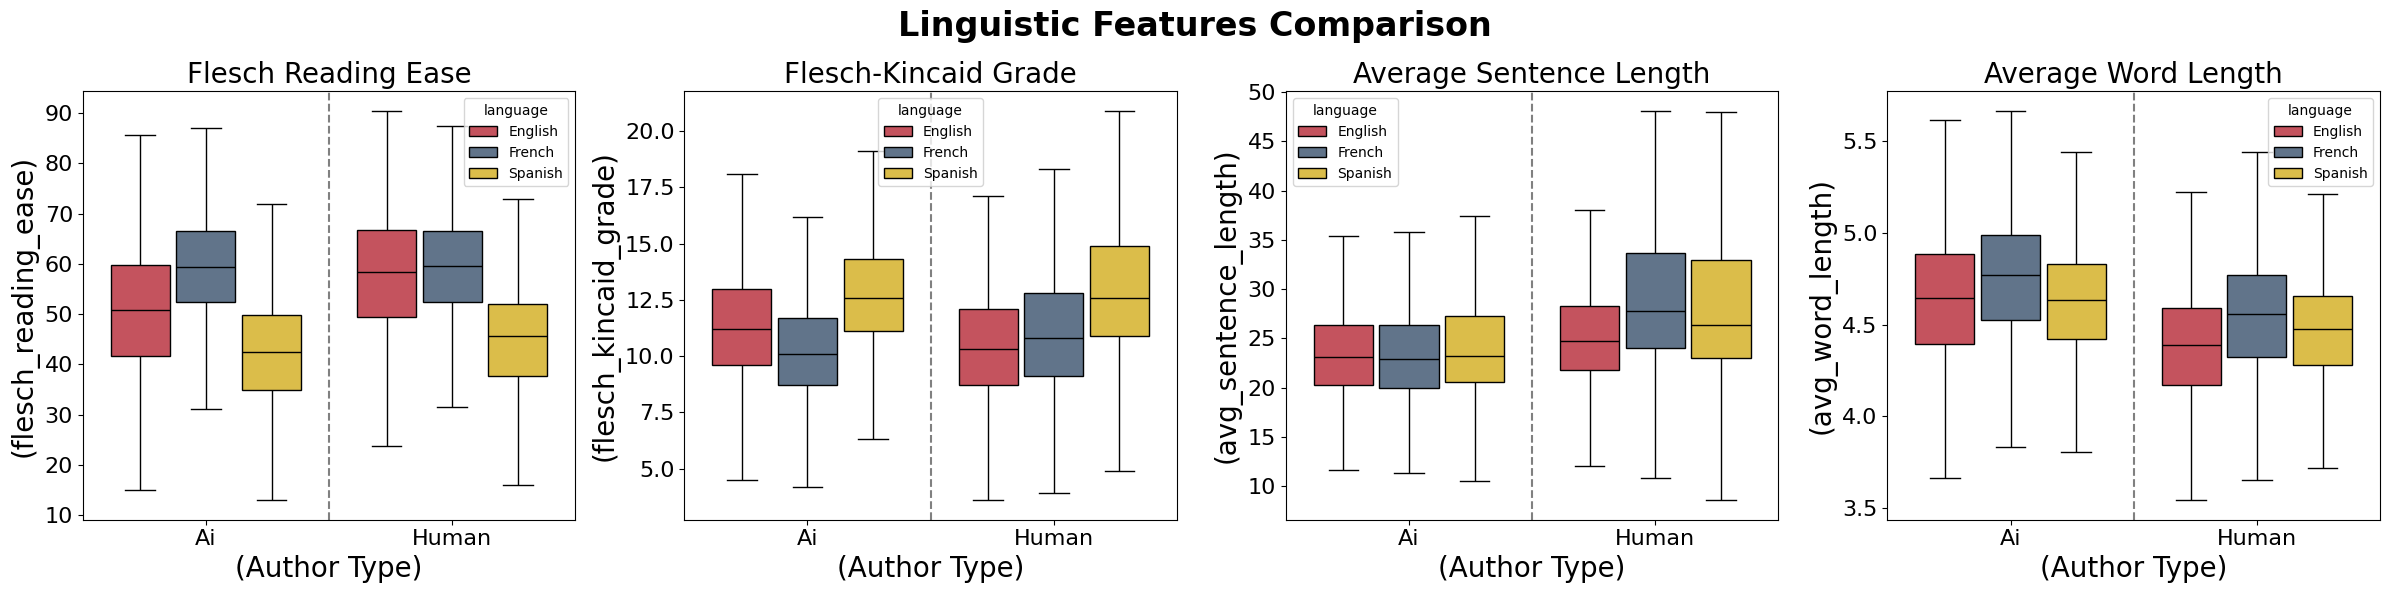

In [38]:
# Add progress bar using tqdm to DataFrame apply function
tqdm.pandas()

# Function to calculate readability and sentence metrics
def linguistic_features(text):
    return pd.Series({
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'avg_sentence_length': sum(len(word_tokenize(sent)) for sent in sent_tokenize(text)) / len(sent_tokenize(text)),
        'avg_word_length': sum(len(word) for word in word_tokenize(text)) / len(word_tokenize(text))
    })

# Define colors for each language based on flags
colors = {
    'English': '#D7404F',  # Red for England
    'Spanish': '#F3CB32',  # Yellow for Spain
    'French': '#5A7391'  # Blue for France
}

# Plotting the features in a single row
def plot_features(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    features = ['flesch_reading_ease', 'flesch_kincaid_grade',
                'avg_sentence_length', 'avg_word_length']
    titles = ['Flesch Reading Ease', 'Flesch-Kincaid Grade',
              'Average Sentence Length', 'Average Word Length']

    for i, feature in enumerate(features):
        sns.boxplot(
            ax=axes[i], x='write_by', y=feature, hue='language',
            data=df, palette=colors, showfliers=False, gap=.1,
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black')
        )
        axes[i].set_title(titles[i], fontsize=20)
        axes[i].set_xlabel('(Author Type)', fontsize=20)
        axes[i].set_ylabel(f'({feature})', fontsize=20)
        # Draw a vertical line after the last 'Ai' group box
        axes[i].axvline(0.5, color=".5", linestyle="--")
        axes[i].tick_params(axis='both', which='major', labelsize=16)

    plt.suptitle('Linguistic Features Comparison', fontweight='bold', fontsize=24)
    plt.tight_layout()
    plt.savefig('linguistic_features_comparison.png', dpi=300)
    plt.show()

# Apply the function to the text column
df[['flesch_reading_ease', 'flesch_kincaid_grade', 'avg_sentence_length',
    'avg_word_length']] = df['text'].progress_apply(linguistic_features)
# Plot all features in one row
plot_features(df)


### 2. Lexical Diversity Metrics

100%|██████████| 23941/23941 [00:49<00:00, 483.41it/s] 


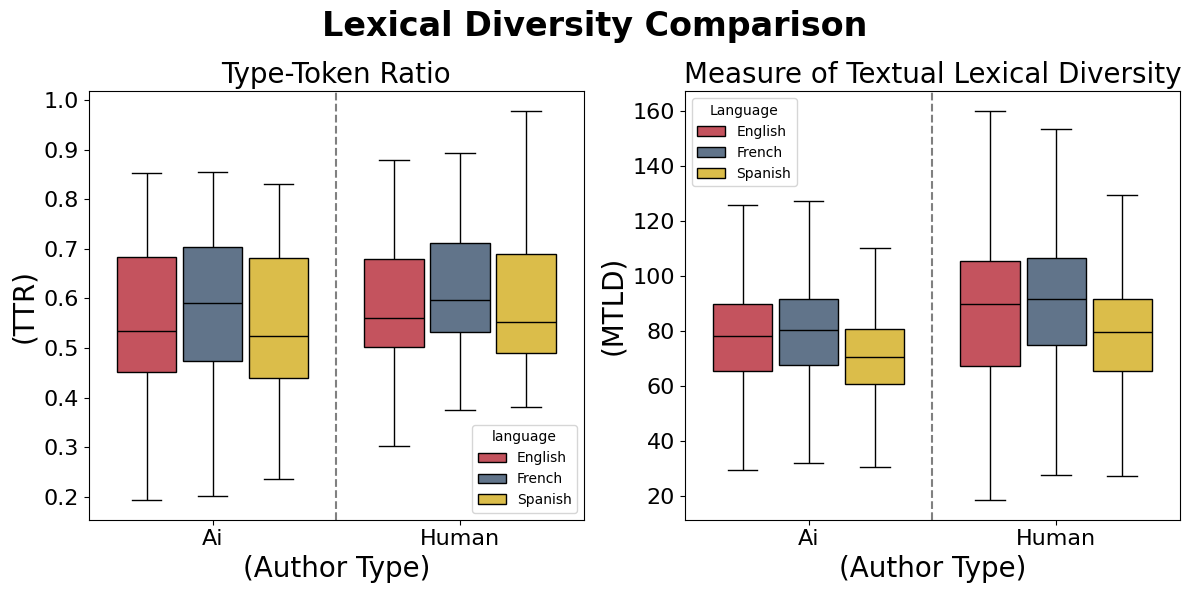

In [39]:
# Add progress bar using tqdm to DataFrame apply function
tqdm.pandas()

# Function to calculate TTR and MTLD


def lexical_diversity_metrics(text):
    tokens = word_tokenize(text)
    ttr = len(set(tokens)) / len(tokens) if tokens else 0  # Type-Token Ratio
    # Measure of Textual Lexical Diversity
    mtld = ld.mtld(tokens) if tokens else 0
    return pd.Series({'TTR': ttr, 'MTLD': mtld})


# Define colors for each language based on flags
colors = {
    'English': '#D7404F',  # Red for England
    'Spanish': '#F3CB32',  # Yellow for Spain
    'French': '#5A7391'  # Blue for France
}


# Plotting the results


def plot_lexical_diversity(df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Titles for each subplot
    titles = ['Type-Token Ratio', 'Measure of Textual Lexical Diversity']

    for i, feature in enumerate(['TTR', 'MTLD']):
        # Plot the feature
        sns.boxplot(
            ax=axes[i], x='write_by', y=feature, hue='language',
            data=df, palette=colors, showfliers=False, gap=.1,
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black')
        )
        axes[i].set_title(titles[i], fontsize=20)
        axes[i].set_xlabel('(Author Type)', fontsize=20)
        axes[i].set_ylabel(f'({feature})', fontsize=20)
        # Draw a vertical line after the last 'Ai' group box
        axes[i].axvline(0.5, color=".5", linestyle="--")
        axes[i].tick_params(axis='both', which='major', labelsize=16)

    plt.legend(title='Language')
    plt.suptitle('Lexical Diversity Comparison', fontweight='bold', fontsize=24)
    plt.tight_layout()
    plt.savefig('lexical_diversity_comparison.png', dpi=300)
    plt.show()


# apply the function to the text column, and execute the plotting function
df[['TTR', 'MTLD']] = df['text'].progress_apply(lexical_diversity_metrics)
plot_lexical_diversity(df)


### 3. Syntactic Complexity Analysis

1. **Average Length of a Parse Tree**: This metric reflects the depth of syntactic structures in sentences.
2. **Clause Density**: The number of clauses per sentence can indicate complexity, as more clauses typically imply more complex syntactic constructions.
3. **Dependency Distance**: Average distance between dependent words in a sentence. Longer distances can indicate more complex syntactic structuresary depending on the specifics of your dataset and analysis goals.

The "Average Length of a Parse Tree" is a syntactic complexity metric that measures the depth of the syntactic tree (parse tree) of a sentence. In natural language processing, a parse tree visually represents the grammatical structure of a sentence, showing how words are grouped into phrases and how phrases relate to each other. Each node in the tree represents a word, and its connections (edges) indicate grammatical relationships, such as subject-verb-object.

#### Understanding Parse Tree Depth

The depth of a parse tree is the longest path from the root node (typically the main verb or clause) to any leaf node (typically a word with no further subdivision). This depth can give insights into the complexity of sentence constructions:

- **Shallow Parse Trees**: These trees have fewer levels, suggesting simpler sentence constructions with fewer nested phrases or clauses. For instance, simple declarative sentences ("The cat sleeps.") typically have shallow parse trees.
- **Deep Parse Trees**: These trees have more levels and are indicative of more complex sentences with multiple nested clauses or heavily modified phrases ("The cat that my sister, who returned yesterday, loves sleeps peacefully.").

#### Calculating Average Parse Tree Depth

To compute this metric:
1. Generate the parse tree for each sentence in a text.
2. Measure the depth of each tree.
3. Calculate the average of these depths for all sentences in the text.

This metric is particularly useful for comparing texts in terms of their syntactic complexity. Texts with a higher average parse tree depth tend to use more complex, nested sentence structures, which might suggest a higher level of language proficiency or a more formal style. In contrast, simpler texts with straightforward information might exhibit shallows in language technology.

100%|██████████| 23941/23941 [13:01<00:00, 30.65it/s]


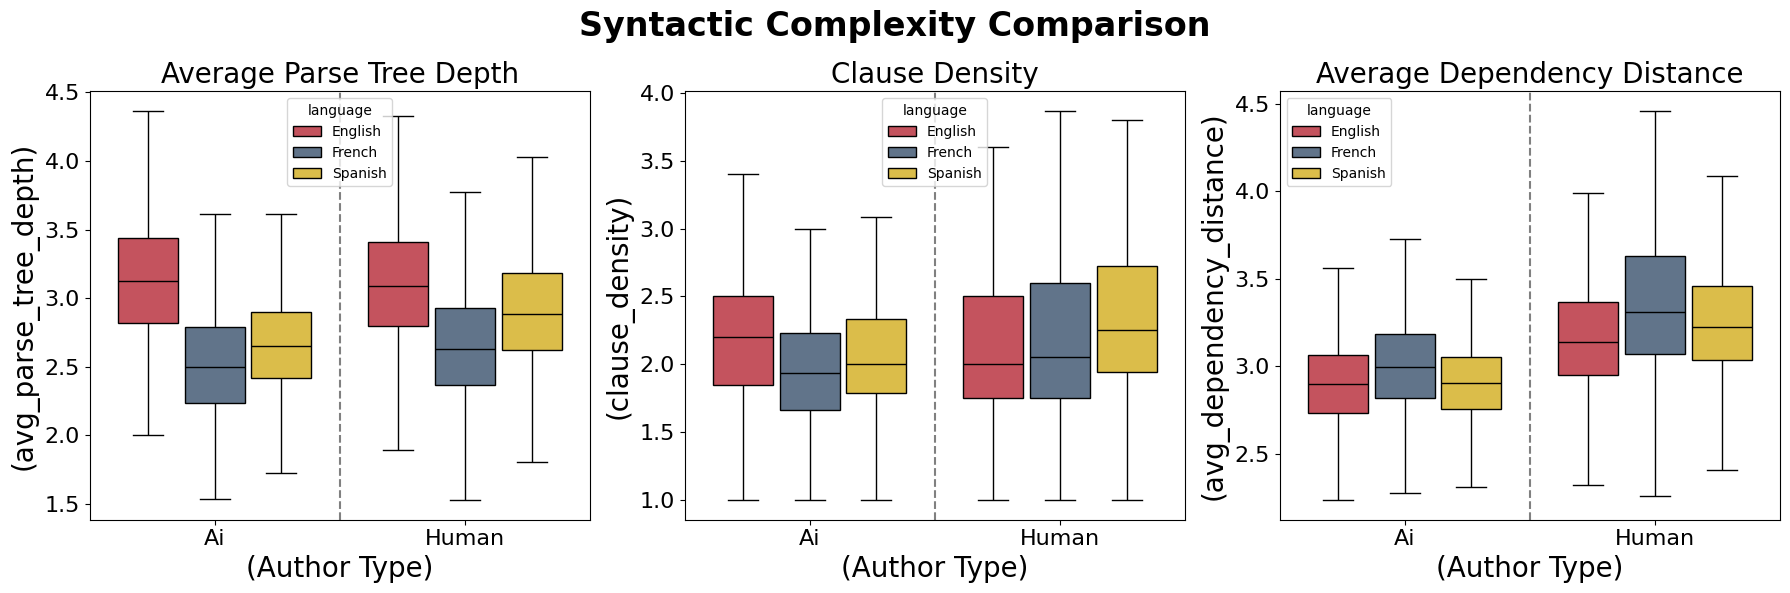

In [40]:
# Load spaCy models
nlp_en = spacy.load("en_core_web_lg")
nlp_es = spacy.load("es_core_news_lg")
nlp_fr = spacy.load("fr_core_news_lg")

# Map languages to spaCy models
language_models = {
    'English': nlp_en,
    'Spanish': nlp_es,
    'French': nlp_fr
}

# Function to calculate syntactic complexity metrics


def syntactic_complexity(text, language):
    nlp = language_models[language]
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    total_deps = sum(len([token for token in sent]) for sent in doc.sents)
    total_depths = sum(len(list(token.ancestors)) for token in doc)
    avg_parse_tree_depth = total_depths / total_deps if total_deps else 0
    clause_count = sum(sent.text.count(
        ',') + 1 for sent in doc.sents) / num_sentences if num_sentences else 0
    avg_dependency_distance = sum(abs(token.i - token.head.i)
                                  for token in doc) / total_deps if total_deps else 0

    return pd.Series({
        'avg_parse_tree_depth': avg_parse_tree_depth,
        'clause_density': clause_count,
        'avg_dependency_distance': avg_dependency_distance
    })


# Apply function to DataFrame
tqdm.pandas()
df[['avg_parse_tree_depth', 'clause_density', 'avg_dependency_distance']] = df.progress_apply(
    lambda row: syntactic_complexity(row['text'], row['language']), axis=1)

# Plotting syntactic complexity features


def plot_syntactic_complexity(df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    features = ['avg_parse_tree_depth',
                'clause_density', 'avg_dependency_distance']
    titles = ['Average Parse Tree Depth',
              'Clause Density', 'Average Dependency Distance']

    for i, feature in enumerate(features):
        sns.boxplot(
            ax=axes[i], x='write_by', y=feature, hue='language',
            data=df, palette=colors, showfliers=False, gap=.1,
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black')
        )
        axes[i].set_title(titles[i], fontsize=20)
        axes[i].set_xlabel('(Author Type)', fontsize=20)
        axes[i].set_ylabel(f'({feature})', fontsize=20)
        axes[i].axvline(0.5, color=".5", linestyle="--")
        axes[i].tick_params(axis='both', which='major', labelsize=16)

    plt.suptitle('Syntactic Complexity Comparison', fontweight='bold', fontsize=24)
    plt.tight_layout()
    plt.savefig('syntactic_complexity_comparison.png', dpi=300)
    plt.show()


# Define colors for each language based on flags
colors = {
    'English': '#D7404F',  # Red for England
    'Spanish': '#F3CB32',  # Yellow for Spain
    'French': '#5A7391'  # Blue for France
}

plot_syntactic_complexity(df)


### 4. Repetitiveness in Text

100%|██████████| 23941/23941 [00:29<00:00, 813.91it/s] 


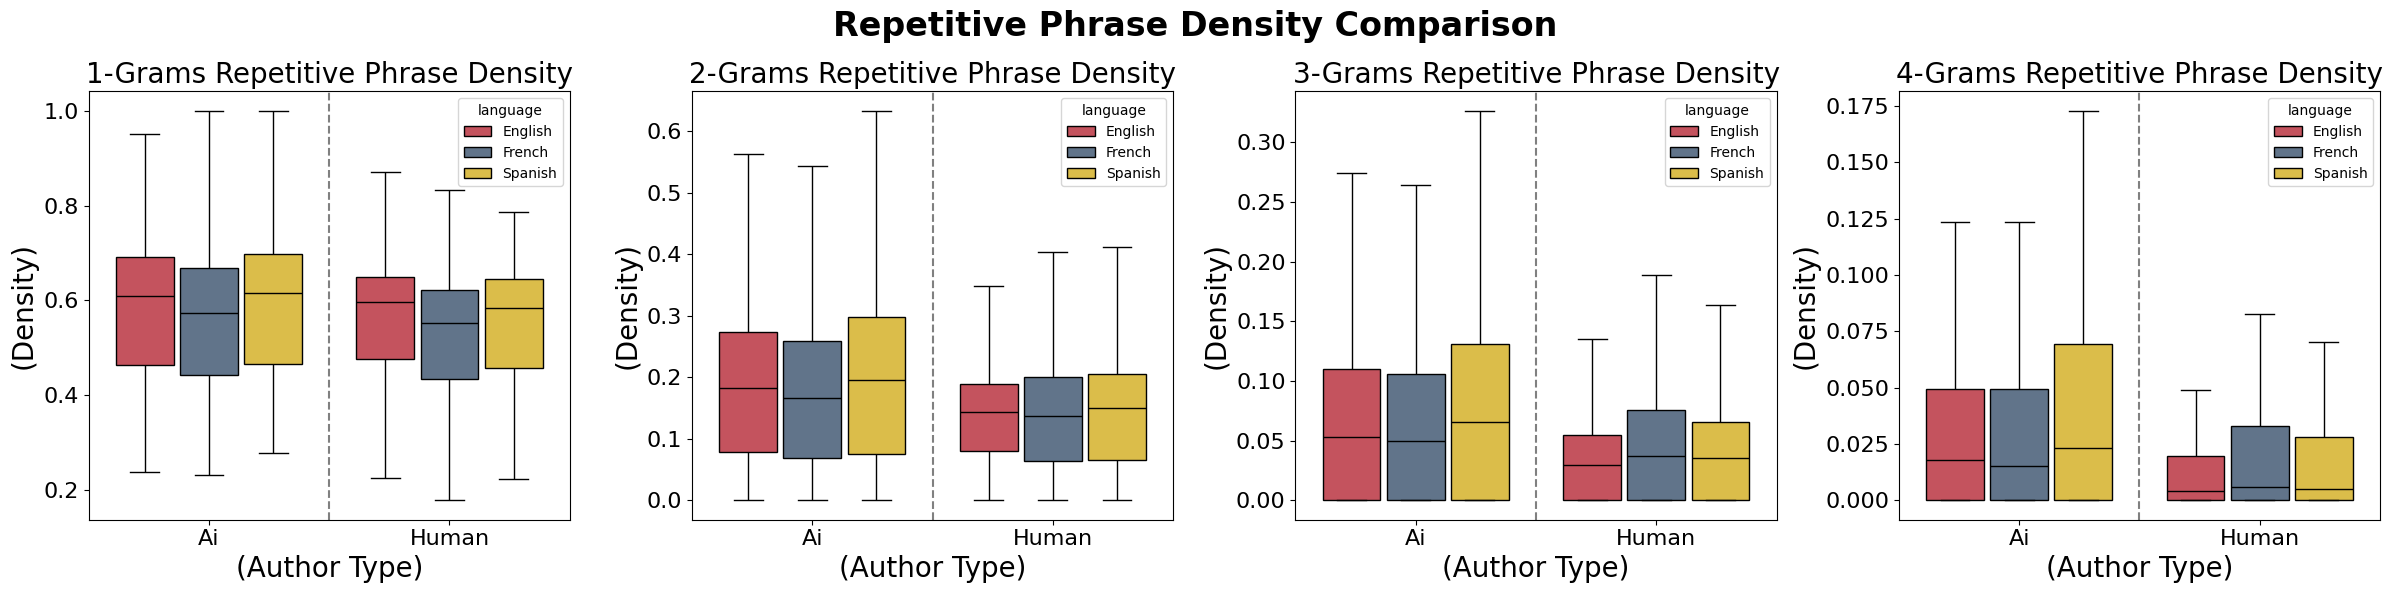

In [41]:
def calculate_repetitive_phrase_density(text, ngram_length=1):
    tokens = word_tokenize(text)
    ngrams = [' '.join(tokens[i:i+ngram_length])
              for i in range(len(tokens) - ngram_length + 1)]
    ngram_counts = Counter(ngrams)
    repetitive_ngrams_count = sum(
        count for ngram, count in ngram_counts.items() if count > 1)
    if len(ngrams) == 0:
        return 0
    return repetitive_ngrams_count / len(ngrams)


def apply_phrase_density(df):
    tqdm.pandas()
    for n in range(1, 5):  # For 1-grams, 2-grams, 3-grams , 4-grams
        df[f'repetitive_phrase_density_{n}-grams'] = df['text'].progress_apply(
            lambda x: calculate_repetitive_phrase_density(x, n))
    return df


# Define colors for each language based on flags for visual consistency
colors = {
    'English': '#D7404F',  # Red for England
    'Spanish': '#F3CB32',  # Yellow for Spain
    'French': '#5A7391'  # Blue for France
}

# Plotting the results



def plot_repetitive_phrase_density(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    ngram_types = [1, 2, 3, 4]
    for i, n in enumerate(ngram_types):
        sns.boxplot(
            ax=axes[i], x='write_by', y=f'repetitive_phrase_density_{n}-grams', hue='language',
            data=df, palette=colors, showfliers=False, gap=.1,
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black')
        )
        axes[i].set_title(f'{n}-Grams Repetitive Phrase Density', fontsize=20)
        axes[i].set_xlabel('(Author Type)', fontsize=20)
        axes[i].set_ylabel('(Density)', fontsize=20)
        axes[i].axvline(0.5, color=".5", linestyle="--")
        axes[i].tick_params(axis='both', which='major', labelsize=16)

    plt.suptitle('Repetitive Phrase Density Comparison', fontweight='bold', fontsize=24)
    plt.tight_layout()
    plt.savefig('repetitive_phrase_density_comparison.png', dpi=300)
    plt.show()


df = apply_phrase_density(df)
plot_repetitive_phrase_density(df)


### 5. Text Perplexity Assessment

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Calculating Perplexity: 100%|██████████| 23941/23941 [3:48:02<00:00,  1.75it/s]  


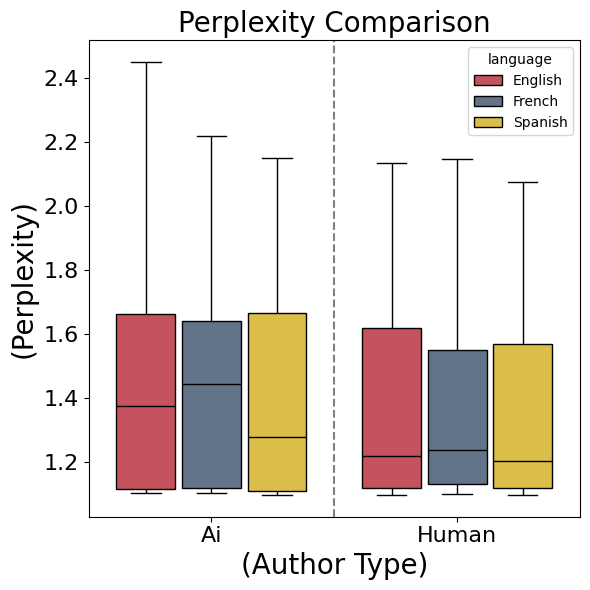

In [42]:
# Load the multilingual BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-multilingual-uncased')
model.eval()  # Set the model to evaluation mode

# Function to calculate perplexity using BERT


def calculate_perplexity(text):
    # Encode text, truncate if longer than the model's maximum input size
    tokenized_input = tokenizer(
        text, return_tensors='pt', max_length=model.config.max_position_embeddings, truncation=True)
    input_ids = tokenized_input['input_ids']

    with torch.no_grad():  # No gradient calculation
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss

    return torch.exp(loss).item()

# Function to apply perplexity calculation to DataFrame


def apply_perplexity(df):
    tqdm.pandas(desc="Calculating Perplexity")
    df['perplexity'] = df['text'].progress_apply(calculate_perplexity)
    return df


df = apply_perplexity(df)

# Plotting function to compare perplexity


def plot_perplexity(df):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(
            x='write_by', y='perplexity', hue='language',
            data=df, palette=colors, showfliers=False, gap=.1,
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black')
        )
    ax.set_title('Perplexity Comparison', fontsize=20)
    ax.set_xlabel('(Author Type)', fontsize=20)
    ax.set_ylabel('(Perplexity)', fontsize=20)
    ax.axvline(0.5, color=".5", linestyle="--")
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()
    plt.savefig('perplexity_comparison.png', dpi=300)
    plt.show()


# Define colors for each language based on flags for visual consistency
colors = {
    'English': '#D7404F',  # Red for England
    'Spanish': '#F3CB32',  # Yellow for Spain
    'French': '#5A7391'  # Blue for France
}

plot_perplexity(df)


### 6. Text Compression Analysis

Calculating Compression Ratios: 100%|██████████| 23941/23941 [01:45<00:00, 227.19it/s]


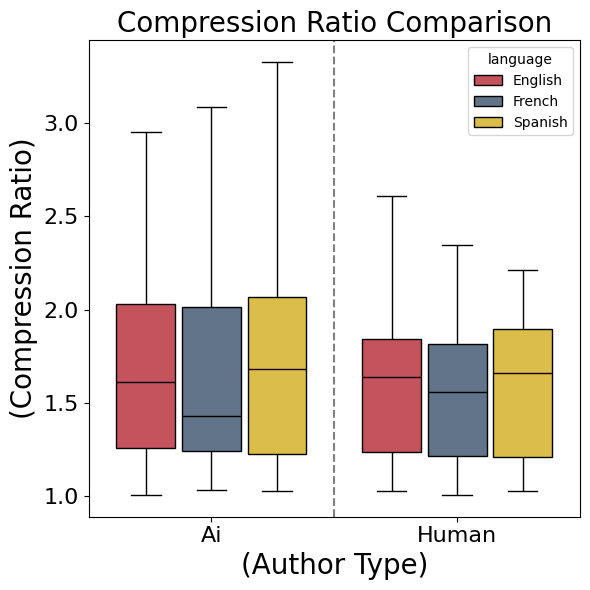

In [43]:
# Function to compute compression ratio using LZMA
def compression_ratio(text):
    if not text:
        return 1  # Avoid division by zero for empty strings
    original_size = len(text.encode('utf-8'))
    compressed_data = lzma.compress(text.encode('utf-8'))
    compressed_size = len(compressed_data)
    return original_size / compressed_size

# Function to apply compression ratio calculation to DataFrame


def apply_compression_ratio(df):
    tqdm.pandas(desc="Calculating Compression Ratios")
    df['compression_ratio'] = df['text'].progress_apply(compression_ratio)
    return df


# Define colors for each language based on flags for visual consistency
colors = {
    'English': '#D7404F',  # Red for England
    'Spanish': '#F3CB32',  # Yellow for Spain
    'French': '#5A7391'  # Blue for France
}

# Plotting function to compare compression ratios


def plot_compression_ratio(df):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(
            x='write_by', y='compression_ratio', hue='language',
            data=df, palette=colors, showfliers=False, gap=.1,
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black')
        )
    ax.set_title('Compression Ratio Comparison', fontsize=20)
    ax.set_xlabel('(Author Type)', fontsize=20)
    ax.set_ylabel('(Compression Ratio)', fontsize=20)
    ax.axvline(0.5, color=".5", linestyle="--")
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()
    plt.savefig('compression_ratio_comparison.png', dpi=300)
    plt.show()


df = apply_compression_ratio(df)
plot_compression_ratio(df)


### 7. Part-of-Speech Distribution

What each of these abbreviations stands for:

1. **ADP** - Adposition: This can include prepositions and postpositions. It's used to express spatial or temporal relations or to mark various semantic roles.

2. **PROPN** - Proper Noun: This denotes a noun that represents a unique entity (e.g., "John", "France", "Microso.ish.

3. **NOUN** - Noun: This represents a person, place, thing, or idea. It's a very common part of speech that serves as the subject or object of a verb, or the object of a preposition.

4. **PUNCT** - Punctuation: This marks symbols like commas, periods, question marks, etc., that aren't assigned lexical meanings but serve to indicate the structure of the text.

5. **DET** - Determiner: This includes articles and other limiters of nouns that express the reference of the noun phrase in context (e.g., "the", "a", "an", "this").

6. **ADJ** - Adjective: This is used to describe, modify, or qualify nouns, giving more detail about the object, person, or situation being described.

7. **VERB** - Verb: This denotes action, occurrence, or state of being. It is a critical part of speech for constructing sentences or phrases, often indicating the action being performed by the subject otext generation.

Calculating POS Distributions: 100%|██████████| 23941/23941 [13:13<00:00, 30.18it/s]


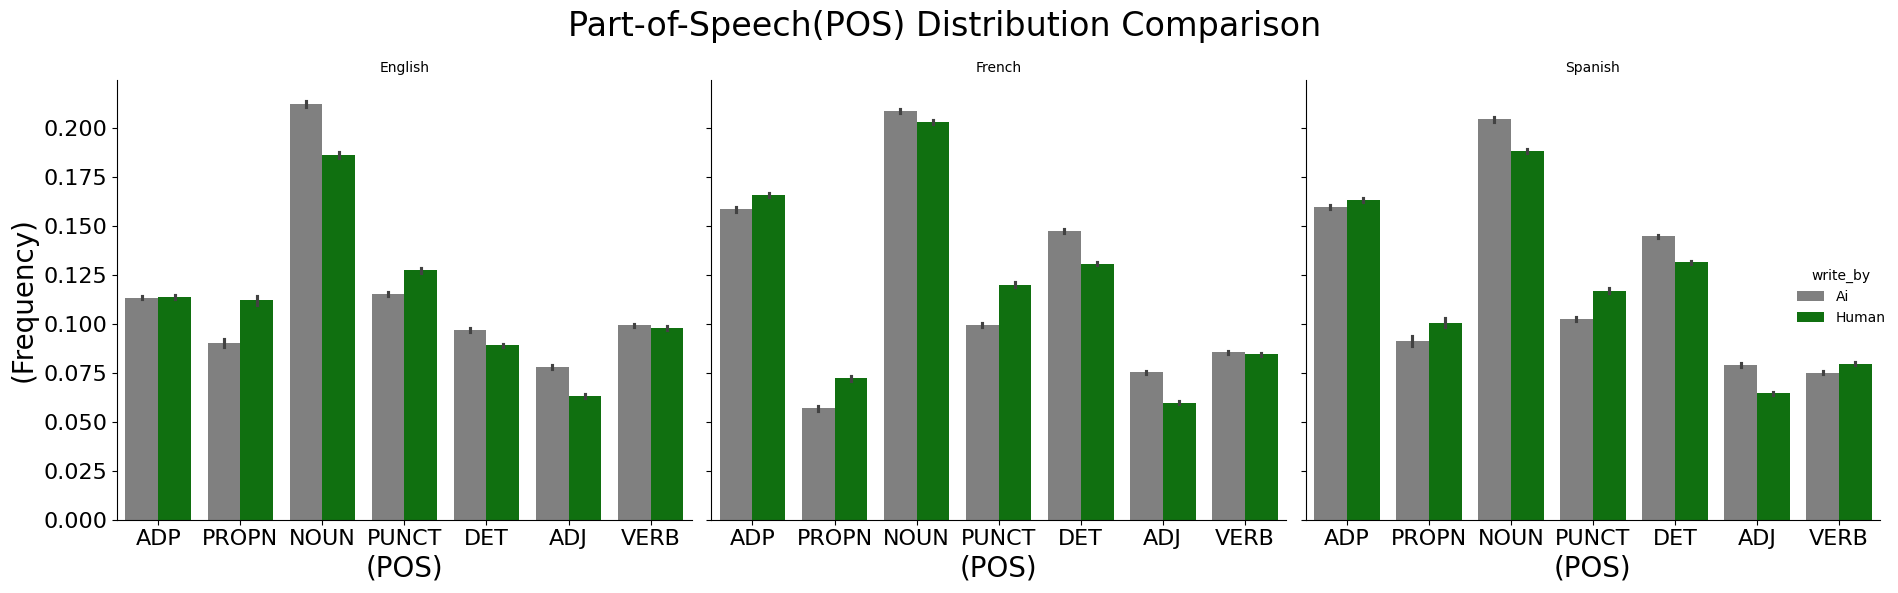

In [44]:
# Load spaCy models
nlp_en = spacy.load("en_core_web_lg")
nlp_es = spacy.load("es_core_news_lg")
nlp_fr = spacy.load("fr_core_news_lg")

# Map languages to spaCy models
language_models = {
    'English': nlp_en,
    'Spanish': nlp_es,
    'French': nlp_fr
}

# Function to calculate POS distribution


def pos_distribution(text, language):
    nlp = language_models[language]
    doc = nlp(text)
    pos_counts = doc.count_by(spacy.attrs.POS)
    total_counts = sum(pos_counts.values())
    pos_distribution = {nlp.vocab.strings[pos_id]: count /
                        total_counts for pos_id, count in pos_counts.items()}
    return pos_distribution

# Apply POS distribution calculation to DataFrame


def apply_pos_distribution(df):
    tqdm.pandas(desc="Calculating POS Distributions")
    df['pos_distribution'] = df.progress_apply(
        lambda row: pos_distribution(row['text'], row['language']), axis=1)
    return df

# Convert POS distribution data for plotting


def prepare_pos_data_for_plotting(df):
    pos_data = []
    for index, row in df.iterrows():
        for pos, frequency in row['pos_distribution'].items():
            pos_data.append({
                'write_by': row['write_by'],
                'language': row['language'],
                'POS': pos,
                'Frequency': frequency
            })

    df_pos = pd.DataFrame(pos_data)

    # Calculate the overall top 7 POS
    top_7_pos = df_pos.groupby('POS')['Frequency'].sum().nlargest(7).index

    # Filter the data for the top 5 POS
    df_pos_top_7 = df_pos[df_pos['POS'].isin(top_7_pos)]

    return df_pos_top_7


# Plotting function to compare POS distributions
def plot_pos_distribution(df_pos):
    g = sns.catplot(x='POS', y='Frequency', hue='write_by', col='language',
                    data=df_pos, kind='bar', palette=colors, height=6, aspect=1)
    g.set_titles("{col_name}", fontsize=24)
    g.set_xlabels("(POS)", fontsize=20)
    g.set_ylabels("(Frequency)", fontsize=20)
    g.tick_params(axis='both', which='major', labelsize=16)
    g.fig.suptitle('Part-of-Speech(POS) Distribution Comparison', fontsize=24)
    plt.tight_layout()
    plt.savefig('pos_distribution_comparison.png', dpi=300)
    plt.show()


colors = {
    'Human': 'green',
    'Ai': 'grey',
}


df = apply_pos_distribution(df)
df_pos = prepare_pos_data_for_plotting(df)
plot_pos_distribution(df_pos)


### 8. Semantic Coherence

Calculating Coherence: 100%|██████████| 23941/23941 [1:27:06<00:00,  4.58it/s]  


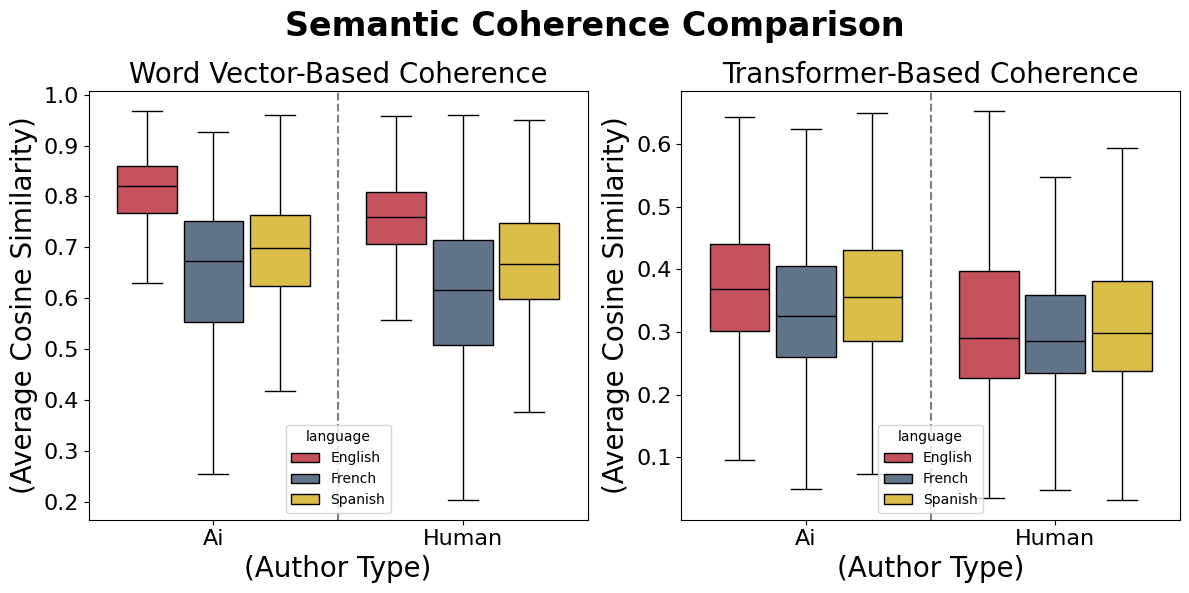

In [45]:
# Load spaCy models for sentence segmentation
nlp_models = {
    'English': spacy.load("en_core_web_lg"),
    'Spanish': spacy.load("es_core_news_lg"),
    'French': spacy.load("fr_core_news_lg")
}

# Load a sentence-transformer model
st_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Function to calculate semantic coherence using spaCy word vectors


def vector_coherence(text, language):
    nlp = nlp_models[language]
    doc = nlp(text)
    sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
    embeddings = np.array([nlp(sent).vector for sent in sentences])
    if len(embeddings) < 2:
        return None
    # Calculate pairwise cosine similarities and average them
    mean_coherence = calculate_mean_coherence(embeddings)
    return mean_coherence

# Function to calculate semantic coherence using Sentence Transformers


def transformer_coherence(text, language):
    nlp = nlp_models[language]
    doc = nlp(text)
    sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
    embeddings = st_model.encode(sentences)
    if len(embeddings) < 2:
        return None
    # Calculate pairwise cosine similarities and average them
    mean_coherence = calculate_mean_coherence(embeddings)
    return mean_coherence


def calculate_mean_coherence(embeddings):
    sim_matrix = cosine_similarity(embeddings)
    # Exclude diagonal elements for mean calculation
    np.fill_diagonal(sim_matrix, np.nan)  # Replace diagonal with NaN
    mean_coherence = np.nanmean(sim_matrix)  # Compute mean excluding NaN
    return mean_coherence


# Function to apply coherence calculations to DataFrame
def apply_coherence(df):
    tqdm.pandas(desc="Calculating Coherence")
    df['vector_coherence'] = df.progress_apply(
        lambda row: vector_coherence(row['text'], row['language']), axis=1)
    df['transformer_coherence'] = df.progress_apply(
        lambda row: transformer_coherence(row['text'], row['language']), axis=1)
    return df


df = apply_coherence(df)

# Define colors for each language based on flags
colors = {
    'English': '#D7404F',  # Red for England
    'Spanish': '#F3CB32',  # Yellow for Spain
    'French': '#5A7391'  # Blue for France
}

# Plotting semantic coherence features


def plot_coherence_features(df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    features = ['vector_coherence', 'transformer_coherence']
    titles = ['Word Vector-Based Coherence', 'Transformer-Based Coherence']

    for i, feature in enumerate(features):
        sns.boxplot(
            ax=axes[i], x='write_by', y=feature, hue='language',
            data=df, palette=colors, showfliers=False, gap=.1,
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black')
        )
        axes[i].set_title(titles[i], fontsize=20)
        axes[i].set_xlabel('(Author Type)', fontsize=20)
        axes[i].set_ylabel('(Average Cosine Similarity)', fontsize=20)
        axes[i].axvline(0.5, color=".5", linestyle="--")
        axes[i].tick_params(axis='both', which='major', labelsize=16)

    plt.suptitle('Semantic Coherence Comparison', fontweight='bold', fontsize=24)
    plt.tight_layout()
    plt.savefig('semantic_coherence_comparison.png', dpi=300)
    plt.show()


plot_coherence_features(df)
